<h1 style="color:#189AB4;font-size:80px;"><strong>Kaggle Survey 2022</strong></h1>


This notebook analyses what changed from 2021 to 2022 in ML and DS, especially for **female** gender. 
In **2022** , **23997** participants from **58** countries took part in the survey, where as in **2021**, there where 25973 participants from 66 countries. 

When considering femal participants, **there is only 3.2% of increase in female survey contributers from last year.**

Survey takers gender wise count and percentage is in the table below:



<table>
  <thead>
    <tr>
      <th> </th>
      <th>2021</th>
       <th>2022</th>
    </tr>
  </thead>
  <tbody>
    <tr>
        <td>Number of Countries</td>
      <td>66</td> <td>58</td>
    </tr>
    <tr>
      <td>Number Participant</td>
      <td>25973</td><td>23997 </td>
    </tr>
      <tr>
      <td>Number of Male Participant</td>
      <td>20598 (79.31%)</td><td>18266 (76.12%)</td>
    </tr>
      <tr>
      <td>Number of Female Participant</td>
      <td>4890 (18.83%)</td><td>5286 (22.03%)</td>
    </tr>
      <tr>
      <td>Number of Nonbinary Participant</td>
      <td>88 (0.34%)</td><td>78 (0.33%)</td>
    </tr>
      <tr>
      <td>Number of Participant who "Prefer to self-describe"</td>
      <td>42 (0.16%)</td><td>33 (0.138%)</td>
    </tr>
      <tr>
      <td>Number of Participant who "Prefer not to say"</td>
      <td>355 (1.37%)</td><td>334 (1.39%)</td>
    </tr>
  </tbody>
</table>

At the end of the notebook there is **Tableau Dashboard** for Kaggle 2022 Survey with link

# Importing Libraries,Data Frame and initial cleaning

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

import pprint
import functools as ft

from IPython.display import display_html

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_methodology.pdf
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_answer_choices.pdf
/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_methodology.pdf
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_answer_choices.pdf


In [2]:
df_22 = pd.read_csv('../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv')
df_21= pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')

df_current = df_22.drop(df_22.index[0])
df_old = df_21.drop(df_21.index[0])
shape=df_current.shape[0]
shape_21 = df_old.shape[0]

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning:

Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning:

Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.



# <div class="section_title">Gender Distribution analysis</div>







  Increase in Woman is only 3.2 % Over Last Year 







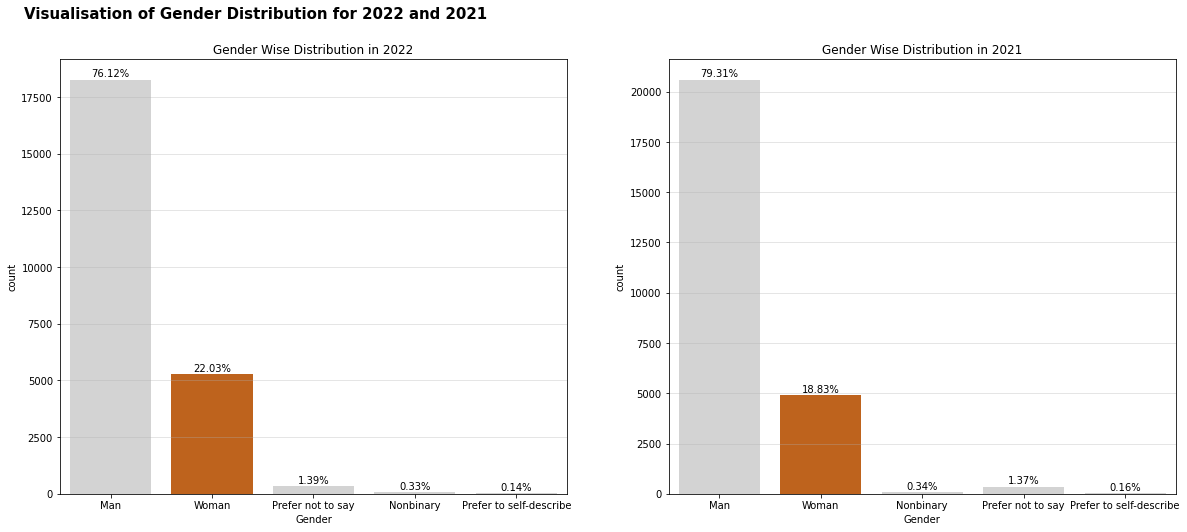

In [3]:
l = df_current['Q3'].value_counts(normalize=True).mul(100).tolist()[1]-df_old['Q2'].value_counts(normalize=True).mul(100).values.tolist()[1]

print(5*'\n',"\033[1;32m Increase in Woman is only\033[1;32m",round(l, 2),'%\033[1;32m Over Last Year\033[1;32m',5*'\n')

fig, ax = plt.subplots(1, 2, figsize=(20,8))
fig.text(0.1, 0.95, "Visualisation of Gender Distribution for 2022 and 2021", fontsize=15, fontweight='bold')  

sns.countplot(x='Q3', data=df_current,palette="Dark2", ax=ax[0]); #Current Year 
sns.countplot(x='Q2', data=df_old,palette="Dark2",ax=ax[1]); #Last Year   
    
for i, ax in enumerate(ax.flatten()):
    ax.grid(axis='y', linestyle='-', alpha=0.4) 
    if i==0:t=shape;year = 2022
    else:t=shape_21;year =2021
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / t:.2f}%\n'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2,p.get_height()), ha='center', va='center')
        ax.set_xlabel('Gender');ax.set_title("Gender Wise Distribution in "+ str(year))
        if not(0.5 <= p.get_x() < 1.5):
            p.set_facecolor('lightgrey')

plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;"> -> Over a year there is only <strong>3.2%</strong> increase in Woman survery takers</p> </div>

# <div class="section_title"> Comparison of countries in 2021 and 2022 </div>


In [4]:
df_old.rename(columns = {'Q3':'2021'}, inplace = True)
df_current.rename(columns = {'Q4':'2022'}, inplace = True)
woman_21 = df_old[df_old['Q2']=='Woman']
woman_22 = df_current[df_current['Q3']=='Woman']

In [5]:
val_count_22 = df_current['2022'].value_counts(normalize=True).mul(100).round(2)
val_count_21 = df_old['2021'].value_counts(normalize=True).mul(100).round(2)

w_21 =  woman_21['2021'].value_counts()/df_old.shape[0]
w_22 =  woman_22['2022'].value_counts()/df_current.shape[0]

In [6]:
layout1 = val_count_21.drop('Other').head(5).sort_values(ascending = True).reset_index()
layout2 = val_count_22.drop('Other').head(5).sort_values(ascending = True).reset_index()
layout3 = w_21.round(5).drop('Other').head(5).sort_values(ascending = True).reset_index()
layout4 = w_22.round(5).drop('Other').head(5).sort_values(ascending = True).reset_index()

layout5 = val_count_21.tail(5).sort_values().reset_index()
layout6 = val_count_22.drop('I do not wish to disclose my location').tail(5).sort_values().reset_index()
layout7 = w_21.tail(5).sort_values().reset_index()
layout8 = w_22.tail(5).sort_values().reset_index()

In [7]:
fig = go.Figure()

fig.add_trace(go.Bar(x = layout2['2022'], y = layout2['index'], orientation='h', name = 'Top 5 in 2022', visible = False,
                     marker = dict(color = 'goldenrod')))
fig.add_trace(go.Bar(x = layout1['2021'], y = layout1['index'], orientation='h', name = 'Top 5 in 2021', visible = False,
                     marker = dict(color = 'darksalmon')))
fig.add_trace(go.Bar(x = layout4['2022'], y = layout4['index'], orientation='h', name = 'Women Top 5 in 2022', visible = False,
                     marker = dict(color = 'forestgreen')))
fig.add_trace(go.Bar(x = layout3['2021'], y = layout3['index'], orientation='h', name = 'Women Top 5 in 2021', visible = False,
                     marker = dict(color = 'saddlebrown')))

fig.update_layout( 
    updatemenus=[ 
        dict(   
            type = "buttons", direction="left", pad={"r": 10, "t": 10}, showactive=True, 
            x=0.26, 
            xanchor="left",y=1.17,yanchor="top",font = dict(color = 'olive',size = 12),
            buttons=list([ 
                dict(label="Top 5 in 2022",       method="update", args=[ {"visible": [True,  False, False, False]},{'showlegend' : True}]), 
                dict(label='Top 5 in 2021',       method="update", args=[ {"visible": [False, True,  False, False]},{'showlegend' : True}]),
                dict(label="Women Top 5 in 2022", method="update", args=[ {"visible": [False, False, True,  False]},{'showlegend' : True}]), 
                dict(label='Women Top 5 in 2021', method="update", args=[ {"visible": [False, False, False, True ]},{'showlegend' : True}]),
                ]),)])

#fig.update_layout(annotations=[dict(text="Choose:", showarrow=False,x=0, y=1.075, yref="paper", align="right", font=dict(size=16,color = 'black'))])

fig.update_layout(title ="Top 5 Survey participating Country - 2022 and 2021 ",
                  title_x = 0.5, title_font = dict(size = 16, color = 'black'))
fig.update_layout(width=1200,autosize=False,height=500)

fig.show()

In [8]:
fig = go.Figure()

fig.add_trace(go.Bar(x = layout6['2022'], y = layout6['index'], orientation='h', name = 'Least 5 in 2022',  visible = False,
                     marker = dict(color = 'goldenrod')))
fig.add_trace(go.Bar(x = layout5['2021'], y = layout5['index'], orientation='h', name = 'Least 5 in 2021',  visible = False,
                     marker = dict(color = 'rebeccapurple')))
fig.add_trace(go.Bar(x = layout8['2022'], y = layout8['index'], orientation='h', name = 'Women least 5 in 2022', visible = False,
                     marker = dict(color = 'turquoise')))
fig.add_trace(go.Bar(x = layout7['2021'], y = layout7['index'], orientation='h', name = 'Women least 5 in 2021', visible = False,
                     marker = dict(color = 'saddlebrown')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons", direction="left", pad={"r": 10, "t": 10}, showactive=True, x=0.16, 
            xanchor="left",y=1.12,yanchor="top",font = dict(color = 'olive',size = 14),
            buttons=list([ 
                dict(label="Least 5 in 2022",    method="update", args=[ {"visible": [True,  False, False, False]},{'showlegend' : True}]), 
                dict(label='Least 5 in 2021',    method="update", args=[ {"visible": [False, True,  False, False]},{'showlegend' : True}]),
                dict(label="Women least 5 in 2022", method="update", args=[ {"visible": [False, False, True,  False]},{'showlegend' : True}]), 
                dict(label='Women least 5 in 2021', method="update", args=[ {"visible": [False, False, False, True ]},{'showlegend' : True}]),
                ]),)])

#fig.update_layout(annotations=[dict(text="Choose:", showarrow=False,x=0, y=1.075, yref="paper", align="right",font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Least 5 Survey participating Country - 2022 and 2021 ",
                  title_x = 0.5, title_font = dict(size = 20, color = 'MidnightBlue'))
fig.update_layout(width=1200,autosize=False,height=500)

fig.show()

In [9]:
display_html(f"<h3><br/>Countries newly Contributed to Survey", raw=True)
pd.merge(val_count_22[np.setdiff1d(val_count_22.index,val_count_21.index)].to_frame().reset_index(),w_22[np.setdiff1d(val_count_22.index,val_count_21.index)].to_frame().reset_index(),on='index')\
.rename(columns={'index':'Country Of Residence','2022_x':'Overall Participants 2022','2022_y':'Women Participants 2022'}).style.background_gradient(cmap='Dark2')

Countries newly Contributed to Survey

,Country Of Residence,Overall Participants 2022,Women Participants 2022
0,Cameroon,0.280000,0.000292
1,Zimbabwe,0.230000,0.000625


In [10]:
display_html(f"<h3><br/>Countries Which Participated in last year, but not this year", raw=True)
pd.merge(val_count_21[np.setdiff1d(val_count_21.index,val_count_22.index)].to_frame().reset_index(),w_21[np.setdiff1d(w_21.index,w_22.index)].to_frame().reset_index(),on='index')\
.rename(columns={'index':'Country Of Residence','2021_x':'Overall Participants 2021','2021_y':'Women Participants 2021'}).style.background_gradient(cmap='Dark2')

Countries Which Participated in last year, but not this year

,Country Of Residence,Overall Participants 2021,Women Participants 2021
0,Austria,0.200000,0.000308
1,Belarus,0.200000,0.000231
2,Denmark,0.180000,0.000231
3,Greece,0.390000,0.000616
4,Iraq,0.170000,0.000308
5,Kazakhstan,0.170000,0.000270
6,Norway,0.170000,0.000385
7,Sweden,0.310000,0.000424
8,Switzerland,0.270000,0.000501
9,Uganda,0.180000,0.000347


In [11]:
temp_1 = val_count_21.drop('Other').iloc[:10].to_frame().reset_index()
temp_2 = val_count_22.drop('Other').iloc[:10].to_frame().reset_index()
temp_1['Rank-2021']= temp_1.apply(lambda row: row.name + 1, axis=1)
temp_2['Rank-2022']= temp_2.apply(lambda row: row.name + 1, axis=1)

index = list(set(val_count_22.drop('Other').iloc[:5].index.append(val_count_21.drop('Other').iloc[:5].index)))

temp = pd.merge(temp_1[temp_1['index'].isin(index)],temp_2,on='index')
temp['% Change over Year']=round(temp['2022']-temp['2021'],2)

In [12]:
t1 = df_old[(df_old['Q2']=='Woman')&(df_old['2021'].isin(index))]['2021'].value_counts().to_frame().reset_index()
t2 = df_current[(df_current['Q3']=='Woman')&(df_current['2022'].isin(index))]['2022'].value_counts().to_frame().reset_index()

t2['Women 2022(%)'] = (t2['2022']/df_current.shape[0]).mul(100).round(2) ;t1['Women 2021(%)'] = (t1['2021']/df_old.shape[0]).mul(100).round(2)

temp1 = pd.merge(t1,t2, on='index')
temp1['% Change of Women Over Year']=round(temp1['Women 2022(%)']-temp1['Women 2021(%)'],2);temp1=temp1.drop(['2021', '2022'], axis=1)
country = pd.merge(temp,temp1,on='index')
country.rename(columns = {'index':'Country of Residence','2021':'Overall - 2021(%)','2022':'Overall - 2022(%)'}, inplace = True)

In [13]:
fig = go.Figure(data=[go.Table(header=dict(values=country.columns,fill_color='light gray'),
                 cells=dict(values=[country['Country of Residence'],country['Overall - 2021(%)'],country['Rank-2021'],country['Overall - 2022(%)'],country['Rank-2022'],country['% Change over Year'],country['Women 2021(%)'],country['Women 2022(%)'],country['% Change of Women Over Year']]
                            ,fill_color='light blue'))])


fig.update_layout(title="Analysis Report of set of 5 Top Countries in 2022 and 2021 - which comes to be 7 countries")                
fig.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details of Countries Wise Contribution</strong>- Note here set of 5 Top countries of 2021 and 2022 are taken which comes to be 7</p> 
    
    
 <li style="padding-left:1em">India and US Remain as the Top two Countries in the Contribution of the Kaggle Survey, with an increase of 8.02% and 1.97% respectively. The rise in woman contributors in the former is 2.7% and later is 0.89%</li>

<li style="padding-left:1em">Japan and China were in 3rd and 4th position in 2021, but they dropped to 6th and 7th position with more than a 1% decrease in contribution.</li> 

<li style="padding-left:1em">Brazil which was in 5th position, Nigeria in 7th position and Pakistan in 9th Position in 2021, is in 3rd, 4th and 5th position in 2022 within and around 0.5%</li>
    
<li style="padding-left:1em">Even in Nigeria the overall contribution is significantly less compared to the top 2, but woman's contribution is increasing</li>
   
<li style="padding-left:1em">Countries Cameroon, and Zimbabwe are two new countries that took part in the survey</li>

<li style="padding-left:1em">10 countries, Austria, Belarus, Denmark, Greece, Iraq, Kazakhstan, Norway, Sweden, Switzerland, and Uganda which has contributed last year, but this year there are no participants</li>

 </div>


# <div class="section_title"> Age Group</div>


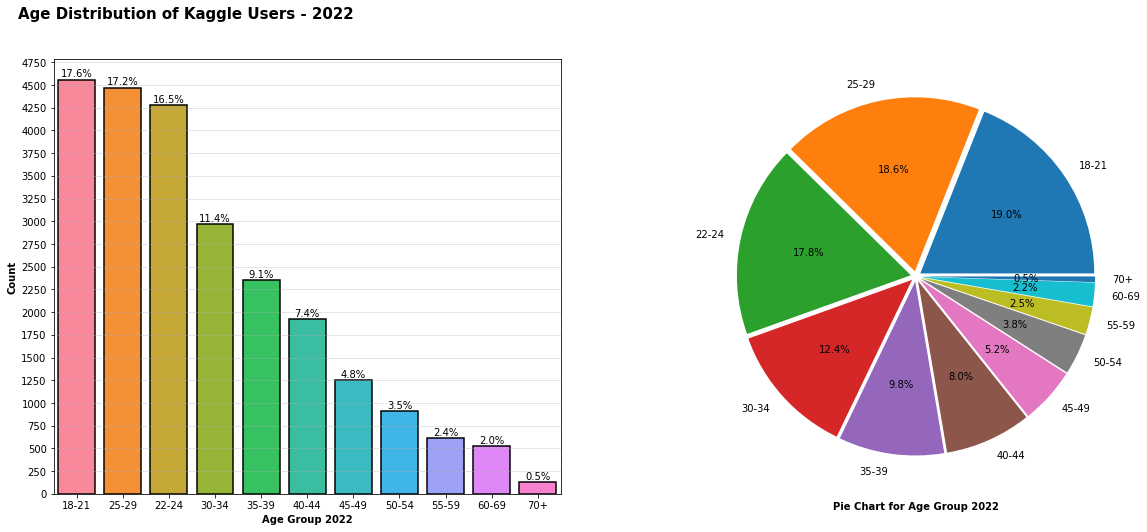

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

fig.text(0.1, 0.95, "Age Distribution of Kaggle Users - 2022", fontsize=15, fontweight='bold') 

sns.barplot(x=df_current['Q2'].value_counts().index, y=df_current['Q2'].value_counts().values, ax=ax[0],
           edgecolor='black', linewidth=1.5, saturation=1.5)
ax[0].yaxis.set_major_locator(MaxNLocator(nbins=20));ax[0].grid(axis='y', linestyle='-', alpha=0.4) 
ax[0].set_ylabel('Count', weight='semibold')
ax[0].set_xlabel('Age Group 2022', weight='semibold')
ax[1].set_xlabel('Pie Chart for Age Group 2022', weight='semibold')
for p in ax[0].patches:
        percentage = f'{100 * p.get_height() / t:.1f}%\n'
        ax[0].annotate(percentage, (p.get_x() + p.get_width() / 2,p.get_height()), ha='center', va='center')
            
ax[1].pie(df_current['Q2'].value_counts(), labels = df_current['Q2'].value_counts().index,  autopct='%1.1f%%',
        explode=[0.03 for i in df_current['Q2'].value_counts().index])

plt.show()

In [15]:
t1 = df_old["Q1"].value_counts(normalize=True).mul(100).round(2).to_frame().reset_index()
t2 =  df_current['Q2'].value_counts(normalize=True).mul(100).round(2).to_frame().reset_index()
age = pd.merge(t1,t2,on='index')
age.rename(columns={'index':'Age Group','Q1': 'Age - 2021(%)','Q2':'Age - 2022(%)'},inplace = True)
age['Age Percent-Change'] = round(age['Age - 2022(%)']-age['Age - 2021(%)'],2)

w1 = (woman_21["Q1"].value_counts()/df_old.shape[0]).mul(100).round(3).to_frame().reset_index()
w2 = (woman_22['Q2'].value_counts()/df_current.shape[0]).mul(100).round(3).to_frame().reset_index()
w_age = pd.merge(w1,w2,on='index')
w_age.rename(columns={'index':'Age Group','Q1': 'Woman_Age - 2021(%)','Q2':'Woman_Age - 2022(%)'},inplace = True)
w_age['Woman_Age Percent-Change'] = round(w_age['Woman_Age - 2022(%)']-w_age['Woman_Age - 2021(%)'],3)
w_age
age = pd.merge(age,w_age,on='Age Group')

In [16]:
fig = go.Figure(data=[go.Table(header=dict(values=age.columns,fill_color='light gray'),
                 cells=dict(values=[age['Age Group'],age['Age - 2021(%)'],age['Age - 2022(%)'],age['Age Percent-Change'],
                                   age['Woman_Age - 2021(%)'],age['Woman_Age - 2022(%)'],age['Woman_Age Percent-Change']],fill_color='lavenderblush'))])


fig.update_layout(title="Analysis Report of Age Group in 2022 and 2021")
                  
fig.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details of Age Wise Contribution</strong></p> 
    
 <li style="padding-left:1em">Age group 25-29, 22-24, 30-34,and 45-49 there is an overall decrease in contribution</li>
 <li style="padding-left:1em">Age group 30-34 has a maximum decrease in the contribution which is 1%.</li>

<li style="padding-left:1em">There is an increase in the contribution of Women in all age groups.</li>
    <li style="padding-left:1em">Even though the 22-24 age group have decreased in contribution in overall survey takers, woman's contribution in this group have a maximum increase which is 0.6%</li>

 </div>


# <div class="section_title"> Student vs Gender</div>


In [17]:
fig = px.sunburst(data_frame=df_current,path=['Q3', 'Q5'],color='Q3', title='Students Vs Gender')

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Insight from Student Vs Gender Analysis</strong></p> 
 <li style="padding-left:1em">Overall and Woman ratio of students and no students do have a very significant difference, as the ratio of women and others compared man is very less in the survey contributors</li>

 </div>


# <div class="section_title"> Popularity of Data Science Courses</div>


In [18]:
def df_comb(df, col_name):
    col = [col for col in df if col.startswith(col_name)]    
    list_1 = [];list_2 = []
    for i in col:
        values = df[i].value_counts().index[0]
        counts = df[i].value_counts()[0]
        
        list_1.append(values);list_2.append(counts)
       
    df_col = pd.DataFrame()
    df_col['values'] = list_1;df_col['counts'] = list_2
    
    df_col = df_col.sort_values(['counts'],ascending=False)
    df_col['percentage'] = (df_col['counts']/df.shape[0]).mul(100)
    
    return df_col

In [19]:
course = pd.merge(df_comb(df_current,'Q6'),df_comb(df_old,'Q40'),on='values', how = 'outer')
course['Rank(Overall) - 2022']= course[('percentage_x')].rank(ascending=False).astype(int)
course['Rank(Overall) - 2021']= course[('percentage_y')].rank(ascending=False).astype(int)

w_courses = pd.merge(df_comb(woman_22,'Q6'),df_comb(woman_21,'Q40'),on='values', how = 'outer')
w_courses['Rank(Woman) - 2022']= w_courses[('percentage_x')].rank(ascending=False).astype(int)
w_courses['Rank(Woman) - 2021']= w_courses[('percentage_y')].rank(ascending=False).astype(int)
course_rank = pd.merge(course,w_courses, on ='values',how='outer')
course_rank = course_rank[['values','Rank(Overall) - 2022','Rank(Overall) - 2021','Rank(Woman) - 2022','Rank(Woman) - 2021']]

In [20]:
def highlightcol(val):
    if val < 4:
        color = 'green'
    elif val <8:
        color = 'orange'
    else:
        color = 'red'
    return 'color: %s' % color

In [21]:
course_rank.style.applymap(highlightcol,subset = pd.IndexSlice[:, ['Rank(Overall) - 2022', 'Rank(Overall) - 2021','Rank(Woman) - 2022', 'Rank(Woman) - 2021']])

,values,Rank(Overall) - 2022,Rank(Overall) - 2021,Rank(Woman) - 2022,Rank(Woman) - 2021
0,Coursera,1,1,1,1
1,University Courses (resulting in a university degree),2,4,2,4
2,Kaggle Learn Courses,3,2,4,2
3,Udemy,4,3,5,3
4,Other,5,9,3,9
5,DataCamp,6,5,6,5
6,LinkedIn Learning,7,8,8,6
7,None,8,11,7,11
8,edX,9,6,9,7
9,Udacity,10,7,10,8


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details of Data Science Courses</strong></p> 
    
    
<strong> <li style="padding-left:1em">Coursera remains to be in the Number one position from last year.</li></strong>
<li style="padding-left:1em">University Courses resulting in univeristiy degrees have moved to 2nd rank from 4th position. 
    </li> 
<li style="padding-left:1em">Kaggle Learn Courses moved to 3rd overall from 2nd rank and in women to 4th.</li>    
<li style="padding-left:1em">Udemy also moved to 4h rank overall and in women to 5th rank</li>

 </div>



# <div class="section_title">  Most Helpful Platform to study Data Science</div>


In [22]:
platform = pd.merge(df_comb(df_current,'Q7'),df_comb(woman_22,'Q7'),on='values')
platform['Rank(Overall) - 2022']= platform[('percentage_x')].rank(ascending=False).astype(int)
platform['Rank(Woman) - 2022']= platform[('percentage_y')].rank(ascending=False).astype(int)
platform_rank = platform[['values','Rank(Overall) - 2022','Rank(Woman) - 2022']]
platform_rank.style.applymap(highlightcol,subset = pd.IndexSlice[:, ['Rank(Overall) - 2022', 'Rank(Woman) - 2022']])

,values,Rank(Overall) - 2022,Rank(Woman) - 2022
0,"Online courses (Coursera, EdX, etc)",1,1
1,"Video platforms (YouTube, Twitch, etc)",2,2
2,"Kaggle (notebooks, competitions, etc)",3,3
3,University courses,4,4
4,"Social media platforms (Reddit, Twitter, etc)",5,5
5,Other,6,6
6,None / I do not study data science,7,7


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details Most helpful Platform to learn DS</strong></p> 
<li style="padding-left:1em">Online courses (Coursera, EdX, etc), Video platforms (YouTube, Twitch, etc), and Kaggle (notebooks, competitions, etc) rank 1, 2, and 3 for DS starters friendly
</li>

<li style="padding-left:1em">As there is a trend in an increase in learning from University Courses with a university degree, it's worth watching if its rank moves up next year.
    </li> 
 </div>



# <div class="section_title"> Paper Published and Research with ML </div>

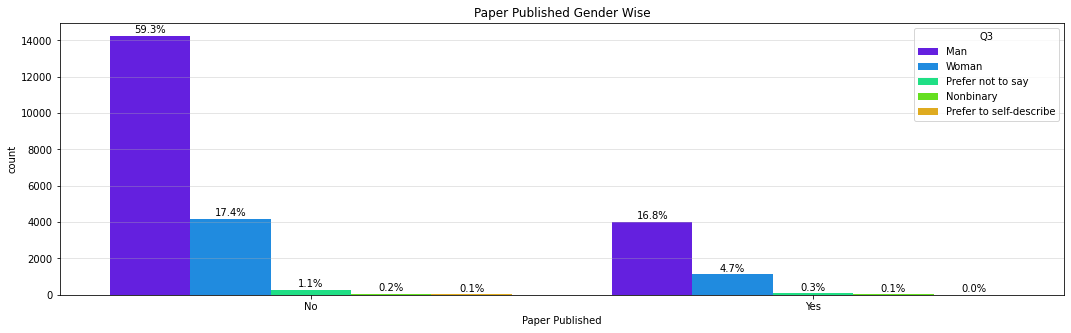

In [23]:
df_current['Q9'].fillna('No', inplace=True) ## As it is confirmed no way to skip question, so considering Null as No
plt.figure(figsize=(18,5))

ax = sns.countplot(x='Q9', data=df_current,palette="gist_rainbow_r", hue= 'Q3')
ax.grid(axis='y', linestyle='-', alpha=0.4)    
for p in ax.patches:
    percentage = f'{100 * p.get_height() / df_current.shape[0]:.1f}%\n'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2,p.get_height()), ha='center', va='center')
    ax.set_xlabel('Paper Published');ax.set_title("Paper Published Gender Wise")
        
plt.show()

In [24]:
from rich.console import Console
from rich.table import Table
both_count = (df_current['Q10_1'].notnull()  & df_current['Q10_2'].notnull()).sum()
console = Console()
table = Table('ML Paper Published', 'Count')

table.add_row('Both Applied and Theoretical Research Paper',str(both_count));table.add_row('')
table.add_row('Only Theoretical Research Paper',str(df_current['Q10_1'].notnull().sum()-both_count));table.add_row('')
table.add_row('Only Applied Research Paper',str(df_current['Q10_2'].notnull().sum()-both_count))
console.print(table)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ ML Paper Published                          ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ Both Applied and Theoretical Research Paper │ 702   │
│                                             │       │
│ Only Theoretical Research Paper             │ 847   │
│                                             │       │
│ Only Applied Research Paper                 │ 1761  │
└─────────────────────────────────────────────┴───────┘

In [25]:
console = Console()
table = Table('ML Paper Published by Woman', 'Count')
both_count = (woman_22['Q10_1'].notnull()  & woman_22['Q10_2'].notnull()).sum()

table.add_row('Published Applied and Theoretical Research Paper',str(both_count));table.add_row('')
table.add_row('Published Only Theoretical Research Paper',str(woman_22['Q10_1'].notnull().sum()-both_count));table.add_row('')
table.add_row('Published Only Applied Research Paper',str(woman_22['Q10_2'].notnull().sum()-both_count))
console.print(table)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ ML Paper Published by Woman                      ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ Published Applied and Theoretical Research Paper │ 140   │
│                                                  │       │
│ Published Only Theoretical Research Paper        │ 226   │
│                                                  │       │
│ Published Only Applied Research Paper            │ 348   │
└──────────────────────────────────────────────────┴───────┘

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details of ML Research papers</strong></p> 
 
 <li style="padding-left:1em">702 participants published both Applied and Theoretical ML Research Paper, out of which 140 are by a woman</li>

<li style="padding-left:1em">847 participants published only Theoretical ML Research Paper, out of which 226 are by a woman.
    </li> 

<li style="padding-left:1em">1761 participants published only Applied ML Research Paper, out of which 348 are a woman</li>
    


 </div>

# <div class="section_title"> Coding Experience </div>

In [26]:
dfs = [df_current['Q11'].value_counts(normalize=True).mul(100).to_frame().reset_index(), df_old['Q6'].value_counts(normalize=True).mul(100).to_frame().reset_index(),woman_22['Q11'].value_counts().to_frame().reset_index(),woman_21['Q6'].value_counts().to_frame().reset_index()]
pgm_exp = ft.reduce(lambda left, right: pd.merge(left, right, on='index'), dfs)

In [27]:
pgm_exp['Women-2021(%)'] = (pgm_exp['Q6_y']/df_old.shape[0]).mul(100)
pgm_exp['Women-2022(%)'] = (pgm_exp['Q11_y']/df_current.shape[0]).mul(100)
pgm_exp.rename(columns={'Q11_x':'2022(%)','Q6_x':'2021(%)'}, inplace=True)
pgm_exp.drop(['Q11_y','Q6_y'],axis=1, inplace=True)

In [28]:
pgm_exp.style.background_gradient(cmap='Pastel1_r',axis=None)

,index,2022(%),2021(%),Women-2021(%),Women-2022(%)
0,1-3 years,27.789012,30.316097,6.025488,6.000750
1,< 1 years,23.465129,22.642744,5.459516,6.054924
2,3-5 years,14.623758,15.635468,2.772109,2.783681
3,5-10 years,10.996859,11.931621,1.867324,1.875234
4,I have never written code,8.763929,3.973357,1.089593,2.942034
5,10-20 years,7.748569,8.339429,1.062642,1.125141
6,20+ years,6.612744,7.161283,0.550572,0.483394


# <div class="section_title"> Preferred Programming Language </div>

In [29]:
pgm_lang = pd.merge(df_comb(df_current,'Q12'),df_comb(df_old,'Q7'),on='values',how='outer');pgm_lang=pgm_lang.fillna(0)
pgm_lang['Rank(Overall) - 2022']= pgm_lang[pgm_lang['percentage_x']!=0]['percentage_x'].rank(ascending=False)
pgm_lang['Rank(Overall) - 2021']= pgm_lang[pgm_lang['percentage_y']!=0]['percentage_y'].rank(ascending=False)

w_pgm_lang = pd.merge(df_comb(woman_22,'Q12'),df_comb(woman_21,'Q7'),on='values',how='outer');w_pgm_lang=w_pgm_lang.fillna(0)
w_pgm_lang['Rank(Woman) - 2022']= w_pgm_lang[w_pgm_lang['percentage_x']!=0]['percentage_x'].rank(ascending=False)
w_pgm_lang['Rank(Woman) - 2021']= w_pgm_lang[w_pgm_lang['percentage_y']!=0]['percentage_y'].rank(ascending=False)
rank = pd.merge(pgm_lang,w_pgm_lang, on ='values',how='outer')
rank = rank[['values','Rank(Overall) - 2022','Rank(Overall) - 2021','Rank(Woman) - 2022','Rank(Woman) - 2021']]
rank.set_index(rank.columns[0],inplace=True); rank = rank.fillna(0)
rank = rank.astype(int)

In [30]:
rank.style.applymap(highlightcol,subset = pd.IndexSlice[:, ['Rank(Overall) - 2022', 'Rank(Overall) - 2021','Rank(Woman) - 2022', 'Rank(Woman) - 2021']])

,Rank(Overall) - 2022,Rank(Overall) - 2021,Rank(Woman) - 2022,Rank(Woman) - 2021
values,,,,
Python,1,1,1,1
SQL,2,2,2,2
R,3,4,3,3
C++,4,3,4,6
Java,5,5,6,5
C,6,6,5,4
Javascript,7,7,7,7
MATLAB,8,8,8,8
Bash,9,10,12,10


## <div class="section_title">Coding Experience Vs Programming Language</div>

In [31]:
df1 = df_current.groupby(['Q11','Q12_1'],dropna= True).size().reset_index(name='Python');df1.drop('Q12_1',axis=1,inplace=True)
df2 = df_current.groupby(['Q11','Q12_3'],dropna= True).size().reset_index(name='SQL');df2.drop('Q12_3',axis=1,inplace=True)
df3 = df_current.groupby(['Q11','Q12_2'],dropna= True).size().reset_index(name='R');df3.drop('Q12_2',axis=1,inplace=True)

w1 = woman_22.groupby(['Q11','Q12_1'],dropna= True).size().reset_index(name='Woman - Python');w1.drop('Q12_1',axis=1,inplace=True)
w2 = woman_22.groupby(['Q11','Q12_3'],dropna= True).size().reset_index(name='Woman - SQL');w2.drop('Q12_3',axis=1,inplace=True)
w3 = woman_22.groupby(['Q11','Q12_2'],dropna= True).size().reset_index(name='Woman - R');w3.drop('Q12_2',axis=1,inplace=True)

val =  df_current.groupby('Q11').size().drop('I have never written code').to_frame(name = 'value_count').reset_index()
w_val = woman_22.groupby('Q11').size().drop('I have never written code').to_frame(name = 'woman_count').reset_index()
dfs = [df1,df2,df3,w1,w2,w3,val, w_val]
lang = ft.reduce(lambda left, right: pd.merge(left, right, on='Q11'), dfs)


In [32]:
lang[lang.columns[1:4]] = (lang[lang.columns[1:4]].div(lang.value_count, axis=0)).mul(100, axis=0)
lang[lang.columns[4:7]] = (lang[lang.columns[4:7]].div(lang.woman_count, axis=0)).mul(100, axis=0)
lang.drop(['value_count','woman_count'],axis=1,inplace=True)

In [33]:
lang.style.background_gradient(cmap='Pastel1_r', axis = None)

,Q11,Python,SQL,R,Woman - Python,Woman - SQL,Woman - R
0,1-3 years,90.509367,43.365846,19.430252,86.944444,49.097222,23.472222
1,10-20 years,87.173792,56.024431,23.542476,83.333333,60.000000,26.296296
2,20+ years,86.662329,54.782043,28.757319,82.758621,53.448276,37.931034
3,3-5 years,90.850250,47.337452,24.124743,87.125749,51.646707,27.245509
4,5-10 years,89.553991,51.643192,24.647887,82.666667,54.000000,25.777778
5,< 1 years,83.021635,37.385405,18.335167,79.146593,38.128011,21.128699


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details of Coding Experience and Programming Languages</strong></p> 
 

<li style="padding-left:1em">Python and SQL remain to be in rank 1 and 2 in both 2021 and 2022.</li>
    <li style="padding-left:1em">R has moved to 3rd rank in overall participants.</li>
    <li style="padding-left:1em">Compared to SQL and R, Python is the most preferred language in all categories of coding experience, that is from less than 1 year to more than 20 years.</li>
    <li style="padding-left:1em">R is having maximum popularity with 20+ years of coding experience participants.</li>
    <li style="padding-left:1em">The average number of users of SQL is the same among all coding experience users, but 10-20 years of coding experience are using it more than others.</li>
 </div>

# <div class="section_title"> IDE Usage </div>

In [34]:
ide = pd.merge(df_comb(df_current,'Q13'),df_comb(df_old,'Q9'),on='values')
ide.rename(columns={'percentage_x':'2022(%)','percentage_y':'2021(%)','counts_x':'2022'},inplace=True)
ide['%Change']=ide['2022(%)']-ide['2021(%)']
ide.set_index(ide.columns[0],inplace=True)
w_ide = pd.merge(df_comb(woman_22,'Q13'),df_comb(woman_21,'Q9'),on='values')
w_ide['%Change_Woman']=w_ide['percentage_x']-w_ide['percentage_y']
w_ide.set_index(w_ide.columns[0],inplace=True)
ide

,2022,2022(%),counts_y,2021(%),%Change
values,,,,,
Jupyter Notebook,13684,57.023795,16233,62.499519,-5.475724
Visual Studio Code (VSCode),9976,41.571863,10040,38.655527,2.916336
PyCharm,6099,25.415677,7468,28.752936,-3.337259
Visual Studio,4416,18.402300,4110,15.824125,2.578175
Notepad++,3891,16.214527,3937,15.158049,1.056478
RStudio,3824,15.935325,4771,18.369076,-2.433750
Spyder,2880,12.001500,3794,14.607477,-2.605977
MATLAB,2302,9.592866,2203,8.481885,1.110981
Sublime Text,2218,9.242822,2839,10.930582,-1.687760


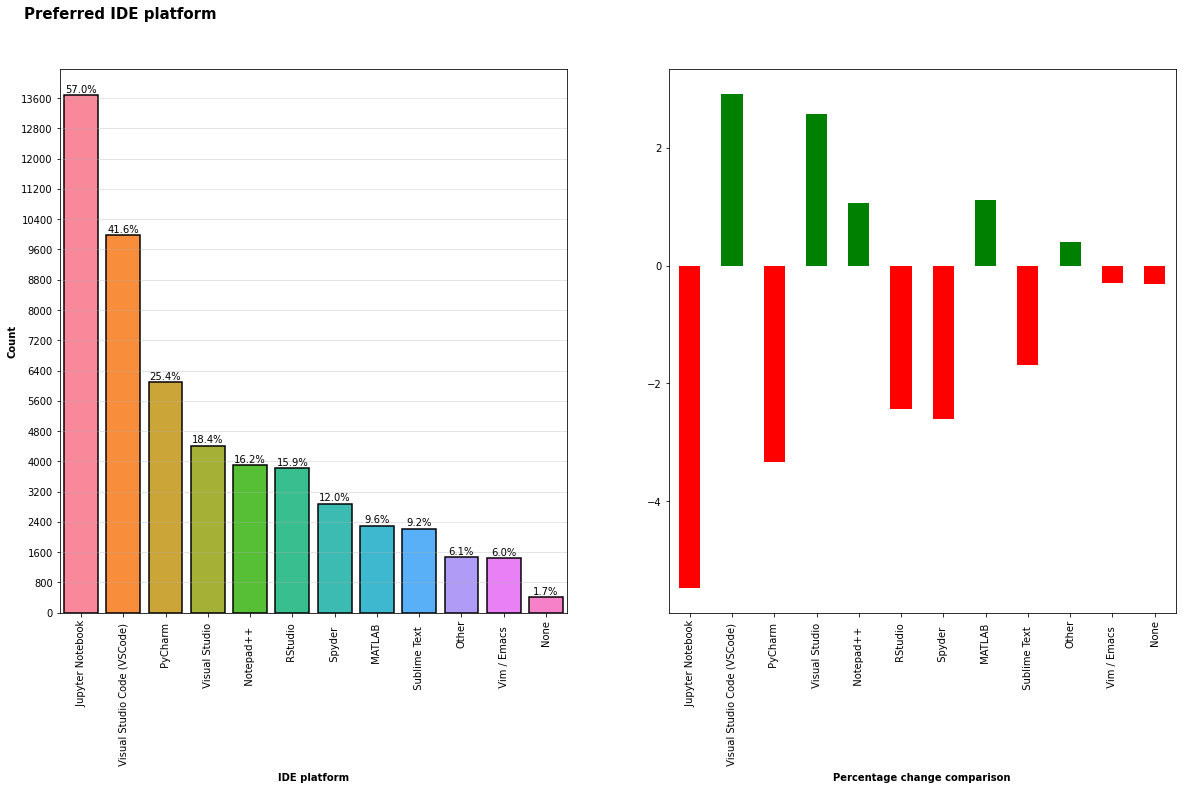

In [35]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

fig.text(0.1, 0.95, "Preferred IDE platform", fontsize=15, fontweight='bold') 

sns.barplot(x=ide.index, y=ide['2022'], ax=ax[0],
           edgecolor='black', linewidth=1.5, saturation=1.5)
ax[0].yaxis.set_major_locator(MaxNLocator(nbins=20));ax[0].grid(axis='y', linestyle='-', alpha=0.4) 
ax[0].set_ylabel('Count', weight='semibold')
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_xlabel('IDE platform', weight='semibold')

for p in ax[0].patches:
        percentage = f'{100 * p.get_height() / shape:.1f}%\n'
        ax[0].annotate(percentage, (p.get_x() + p.get_width() / 2,p.get_height()), ha='center', va='center')
            
cell_col = ide['%Change'];color = (cell_col > 0).apply(lambda x: 'g' if x else 'r')
woman_col = w_ide['%Change_Woman'];w_color = (cell_col > 0).apply(lambda x: 'g' if x else 'r')

ax[1]= cell_col.plot.bar(color=color) 
ax[1].set_xlabel('Percentage change comparison', weight='semibold')


plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details of IDE Usage</strong></p> 
 

<li style="padding-left:1em">Even if the Jupyter notebook is highly used IDE(57%), compared to last year there is a decline of 5.7%.</li>
    <li style="padding-left:1em">Pycharm has a 3.3% reduction in usage, R studio has 2.4% and Spyder has 2.6%.</li>
    <li style="padding-left:1em">Whereas VS code has an increase of 2.9%, even though overall usage is only 38.7%</li>
      

# <div class="section_title"> Hosted Notebook </div>

In [36]:
host = pd.merge(df_comb(df_current,'Q14'),df_comb(df_old,'Q10'),on='values', how= 'outer')
host = host.fillna(0)
host.rename(columns={'percentage_x':'2022(%)','percentage_y':'2021(%)','counts_x':'2022'},inplace=True)
host['%Change']=host['2022(%)']-host['2021(%)']
host.set_index(host.columns[0],inplace=True)
host = host.iloc[:16,:];host

,2022,2022(%),counts_y,2021(%),%Change
values,,,,,
Colab Notebooks,8929.0,37.208818,9792.0,37.700689,-0.491871
Kaggle Notebooks,7478.0,31.162229,9507.0,36.603396,-5.441167
None,6740.0,28.086844,7174.0,27.620991,0.465853
IBM Watson Studio,964.0,4.017169,1067.0,4.108112,-0.090943
Azure Notebooks,885.0,3.687961,1062.0,4.088862,-0.400901
Google Cloud Vertex AI Workbench,870.0,3.625453,0.0,0.000000,3.625453
Amazon Sagemaker Studio,735.0,3.062883,0.0,0.000000,3.062883
Databricks Collaborative Notebooks,610.0,2.541984,590.0,2.271590,0.270395
Other,582.0,2.425303,737.0,2.837562,-0.412259


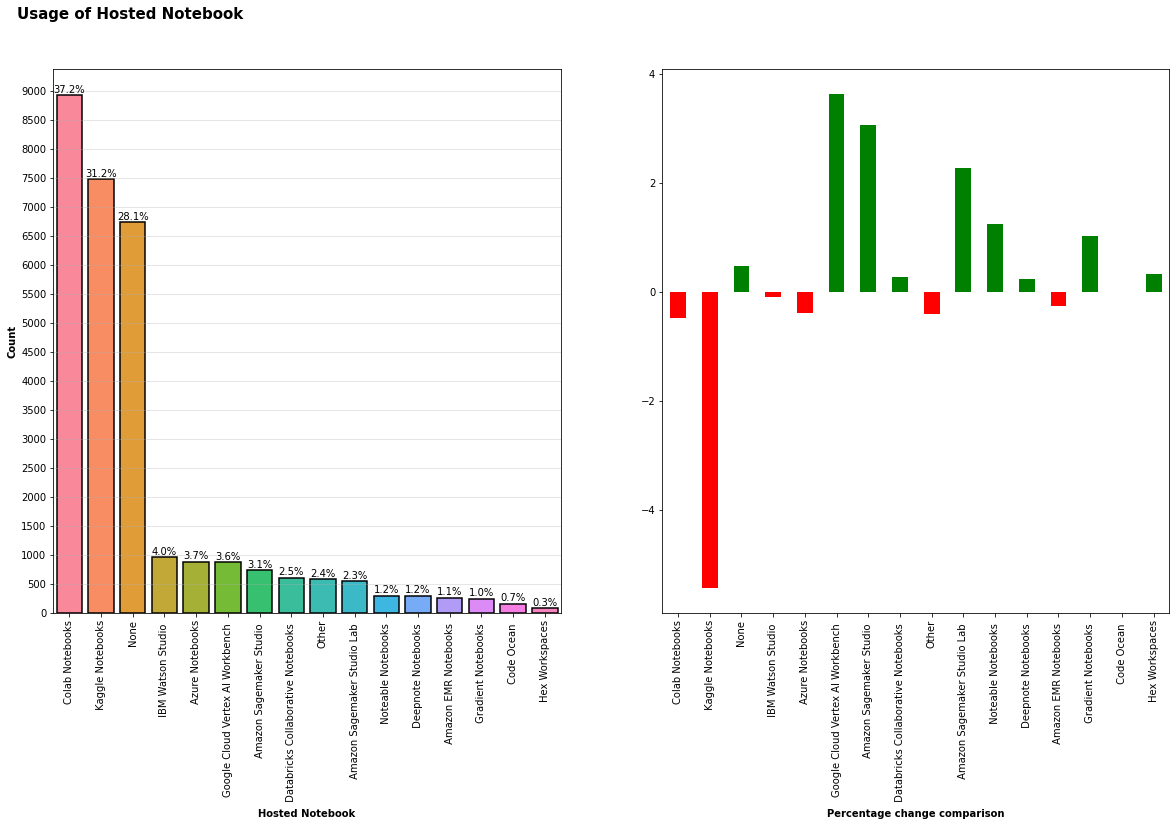

In [37]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

fig.text(0.1, 0.95, "Usage of Hosted Notebook", fontsize=15, fontweight='bold') 

sns.barplot(x=host.index, y=host['2022'], ax=ax[0],
           edgecolor='black', linewidth=1.5, saturation=1.5)
ax[0].yaxis.set_major_locator(MaxNLocator(nbins=20));ax[0].grid(axis='y', linestyle='-', alpha=0.4) 
ax[0].set_ylabel('Count', weight='semibold')
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_xlabel('Hosted Notebook', weight='semibold')

for p in ax[0].patches:
        percentage = f'{100 * p.get_height() / shape:.1f}%\n'
        ax[0].annotate(percentage, (p.get_x() + p.get_width() / 2,p.get_height()), ha='center', va='center')
            
cell_col = host['%Change'];color = (cell_col > 0).apply(lambda x: 'g' if x else 'r')


ax[1]= cell_col.plot.bar(color=color) 
ax[1].set_xlabel('Percentage change comparison', weight='semibold')

plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details of Coding Experience and Programming Languages</strong></p> 
 

<li style="padding-left:1em">Colab Notebooks is mostly used (37.2%), but overall there is a 0.5% decrease in its usage.</li>
    <li style="padding-left:1em">Kaggle Notebooks is second largely used with 31.16%, but it has a maximum decrease in usage from last year which is 5.44%.</li>
    <li style="padding-left:1em">Preference for IBM Watson Studio, Amazon EMR Notebooks, Code Ocean, and Azure Notebooks also decreased.</li>


# <div class="section_title"> Data Visualisation Libraries</div>

In [38]:
vis = pd.merge(df_comb(df_current,'Q15'),df_comb(df_old,'Q14'),on='values', how= 'outer');vis = vis.fillna(0)
vis.rename(columns={'percentage_x':'2022(%)','percentage_y':'2021(%)','counts_x':'2022'},inplace=True)
vis['%Change']=vis['2022(%)']-vis['2021(%)']
vis.set_index(vis.columns[0],inplace=True)
vis = vis[['2022(%)','2021(%)']]
w_vis = pd.merge(df_comb(woman_22,'Q15'),df_comb(woman_21,'Q14'),on='values', how= 'outer');w_vis = w_vis.fillna(0)
w_vis['%Change_Woman']=w_vis['percentage_x']-w_vis['percentage_y']
w_vis.set_index(w_vis.columns[0],inplace=True)
w_vis.rename(columns={'percentage_x':'Woman - 2022(%)','percentage_y':'Woman - 2021(%)'},inplace=True)
w_vis = w_vis[['Woman - 2022(%)','Woman - 2021(%)']]

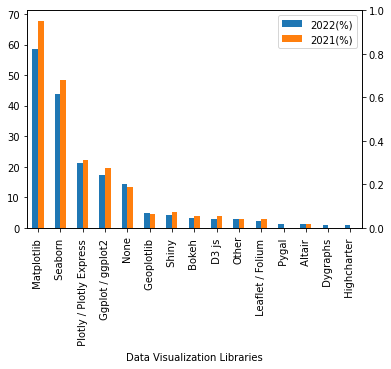

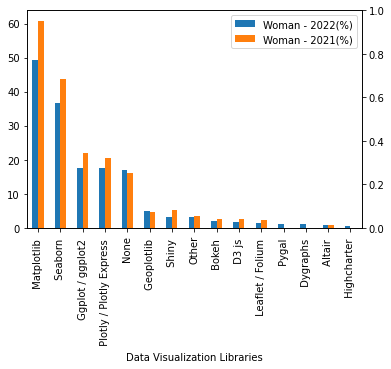

In [39]:
ax0= vis.plot(kind="bar")
ax1 = ax0.twinx()
ax0.set_xlabel('Data Visualization Libraries', fontsize=10)

ax2 = w_vis.plot(kind="bar")
ax3 = ax2.twinx()
ax2.set_xlabel('Data Visualization Libraries', fontsize=10)
plt.show()


# <div class="section_title"> Machine Learning FrameWork</div>

In [40]:
mk_fram = pd.merge(df_comb(df_current,'Q17'),df_comb(df_old,'Q16'),on='values', how ='left');mk_fram = mk_fram.fillna(0)
mk_fram.rename(columns={'percentage_x':'2022(%)','percentage_y':'2021(%)','counts_x':'2022'},inplace=True)
mk_fram['%Change']=mk_fram['2022(%)']-mk_fram['2021(%)']
mk_fram.set_index(mk_fram.columns[0],inplace=True)
mk_fram = mk_fram[['2022(%)','2021(%)']]
w_mk_fram = pd.merge(df_comb(woman_22,'Q17'),df_comb(woman_21,'Q16'),on='values', how ='left');w_mk_fram = w_mk_fram.fillna(0)
w_mk_fram['%Change_Woman']=w_mk_fram['percentage_x']-w_mk_fram['percentage_y']
w_mk_fram.set_index(w_mk_fram.columns[0],inplace=True)
w_mk_fram.rename(columns={'percentage_x':'Woman - 2022(%)','percentage_y':'Woman - 2021(%)'},inplace=True)
w_mk_fram = w_mk_fram[['Woman - 2022(%)','Woman - 2021(%)']]

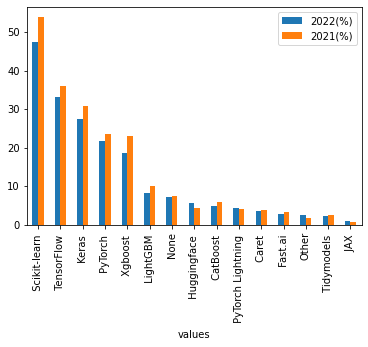

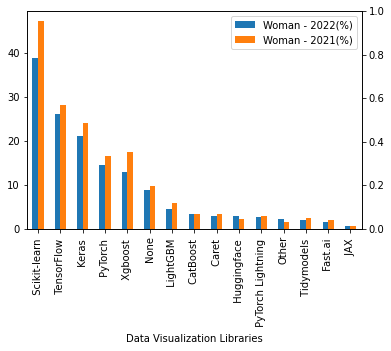

In [41]:
ax1 = ax0.twinx()

ax1 = mk_fram.plot(kind="bar")
ax0.set_xlabel('Data Visualization Libraries', fontsize=10)
plt.xticks(rotation=90)
ax2 = w_mk_fram.plot(kind="bar")
ax3 = ax2.twinx()
ax2.set_xlabel('Data Visualization Libraries', fontsize=10)
plt.show()
plt.close()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details of Visualization Libraries and ML frame work</strong></p> 
<li style="padding-left:1em">There is a sight decrease in usage of all popular visualization libraries, is it because, survey contributors are using Highcharter, Pygal, and Dygraphs?</li>
    <li style="padding-left:1em">Like visualization libraries, there is a slight decrease in the usage of popular ML frameworks.


# <div class="section_title">Current Job Title </div>

In [42]:
from wordcloud import WordCloud,STOPWORDS

Word Cloud for overall Job Titles

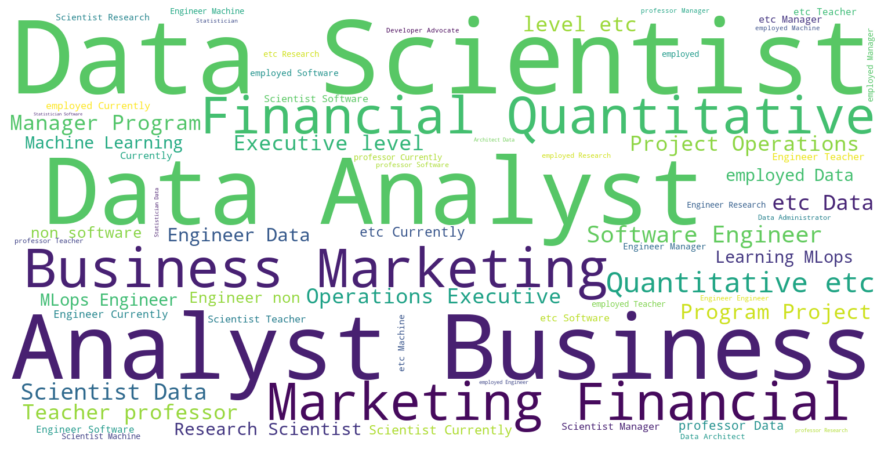

In [43]:
display_html(f"<h3><br/>Word Cloud for overall Job Titles", raw=True)
fig = plt.gcf()
fig.set_size_inches(16, 8)
wc = WordCloud(stopwords=STOPWORDS,background_color="white", contour_width=2, contour_color='orange',width=1500, height=750,max_words=150, max_font_size=256,random_state=42)
wc.generate(" ".join(df_current[df_current['Q23'].notnull()]['Q23']))
fig = plt.imshow(wc, interpolation="bilinear")
fig = plt.axis('off')

Word Cloud for overall Woman Titles

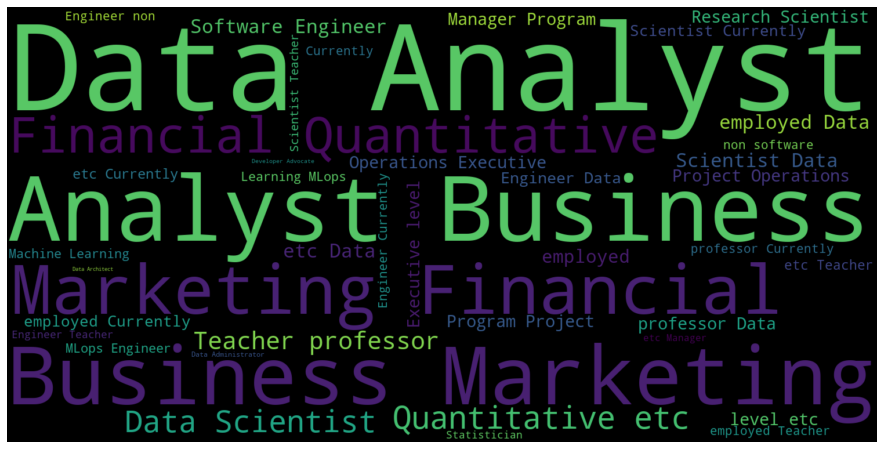

In [44]:
display_html(f"<h3><br/>Word Cloud for overall Woman Titles", raw=True)
fig = plt.gcf()
fig.set_size_inches(16, 8)
wc = WordCloud(stopwords=STOPWORDS,background_color="black", contour_width=2, contour_color='orange',width=1500, height=750,max_words=150, max_font_size=256,random_state=42)
wc.generate(" ".join(woman_22[woman_22['Q23'].notnull()]['Q23']))
fig = plt.imshow(wc, interpolation="bilinear")
fig = plt.axis('off')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details of Current Job Titles</strong></p> 
 

<li style="padding-left:1em">The Most popular Designation of survey takers is Data Scientist</li>
    <li style="padding-left:1em">Considering women the most popular survey takers are Data Analysts. Is it that Woman Data Scientists are less active on Kaggle, so missed the survey?</li>
    


## <div class="section_title">Job Title Vs Programming Language</div>

In [45]:
def visualize_relation(df,start_slice, end_slice, new_col_names, old_col, new_col, xlabel, title, p1,p2,cmap):
    df_sliced = df.iloc[:,start_slice:end_slice].iloc[1:]

    df_sliced = df_sliced.rename(columns=new_col_names).fillna(0).replace('[^\\d]',1, regex=True)
    df_sliced = df_sliced.join(df[old_col])

    df_sliced_stats = pd.DataFrame()
    for col in df_sliced.columns[:-1]:
        df_sliced_stats[col] = df_sliced.groupby(old_col)[col].mean().values

    df_sliced = df_sliced.rename(columns={old_col:new_col})
    df_sliced_stats.index = df_sliced.groupby(new_col)[list(new_col_names.items())[0][1]].mean().index

    display(df_sliced_stats.style.background_gradient(cmap=cmap, axis=0).format("{:.0%}"))
    
    plt.show()

In [46]:
lang_col ={'Q12_1': 'Python',
                'Q12_2' : 'R',
                'Q12_3' : 'SQL',
                'Q12_4' : 'C',
                'Q12_5' : '#C',
                'Q12_6' : 'C++',
                'Q12_7' : 'Java',
                'Q12_8' : 'Javascript',
                'Q12_9' : 'Bash',
                'Q12_10': 'PHP',
                'Q12_11': 'MATLAB',
                'Q12_12': 'Julia',
                'Q12_13': 'Go',
                'Q12_14': 'None',
                'Q12_15': 'Other'
                }
visualize_relation(df_current, 30,45, lang_col, 'Q23', 'Job Title', "Usage of Programming Language", "Job Title vs Programming Language", 150, 275,'viridis')

,Python,R,SQL,C,#C,C++,Java,Javascript,Bash,PHP,MATLAB,Julia,Go,None,Other
Job Title,,,,,,,,,,,,,,,
Currently not employed,72%,15%,34%,9%,3%,9%,8%,10%,3%,3%,6%,1%,1%,2%,4%
Data Administrator,57%,21%,56%,7%,13%,6%,10%,16%,7%,9%,1%,0%,0%,4%,9%
"Data Analyst (Business, Marketing, Financial, Quantitative, etc)",74%,24%,58%,5%,3%,7%,6%,9%,4%,4%,5%,1%,1%,2%,7%
Data Architect,86%,16%,73%,13%,24%,14%,32%,28%,19%,11%,5%,5%,8%,0%,16%
Data Engineer,90%,16%,73%,12%,10%,15%,19%,19%,23%,6%,6%,1%,3%,0%,11%
Data Scientist,94%,27%,59%,7%,5%,8%,9%,10%,13%,3%,7%,2%,1%,0%,6%
Developer Advocate,79%,15%,43%,18%,15%,21%,34%,36%,16%,18%,5%,3%,5%,0%,13%
Engineer (non-software),68%,11%,27%,8%,2%,11%,7%,8%,5%,3%,14%,1%,0%,5%,8%
Machine Learning/ MLops Engineer,97%,11%,40%,11%,6%,20%,14%,16%,26%,4%,9%,2%,3%,0%,5%


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details Job Title with Programming language</strong></p> 
 

<li style="padding-left:1em">Irrespective of Job Title Python is most commonly used.</li>
    <li style="padding-left:1em">Apart from Python, as per Job Most Commonly used Other languages are(More than 20%):</li>
    <li style="padding-left:3em">Data Administrator and Data Analyst - SQL and R</li>
    <li style="padding-left:3em">Data Architect - SQL, Java, #C</li>
    <li style="padding-left:3em">Data Engineer - SQL, BASH</li>
    <li style="padding-left:3em">Data Scientist - SQL , R</li>
    <li style="padding-left:3em">Developer Advocate - SQL, Java, C++</li>
    <li style="padding-left:3em">Engineer (non-software) - SQL</li>
    <li style="padding-left:3em">Machine Learning/ MLops Engineer - SQL, BASH, C++</li>
    <li style="padding-left:3em">Manager - SQL, R</li>
    <li style="padding-left:3em">Research Scientist - R, MATLAB, C++</li>
    <li style="padding-left:3em">Software Engineer - SQL, JavaScript,Java,C++, C</li>
    <li style="padding-left:3em">Statistician - R, SQL</li>
    <li style="padding-left:3em">Teacher / professor- SQL, C, R, MATLAB, Java</li>

## <div class="section_title">Job Title Vs ML algorithm Usage</div>

In [47]:
lang_col ={'Q18_1': 'Linear or Logistic Regression',
                'Q18_2' : 'Decision Trees or Random Forests',
                'Q18_3' : 'Gradient Boosting Machines',
                'Q18_4' : 'Bayesian Approaches',
                'Q18_5' : 'Evolutionary Approaches',
                'Q18_6' : 'DNN',
                'Q18_7' : 'CNN',
                'Q18_8' : 'GAN',
                'Q18_9' : 'RNN',
                'Q18_10': 'Transformer Networks',
                'Q18_11': 'Autoencoder Networks',
                'Q18_12': 'Graph Neural Networks',
                'Q18_13': 'None',
                'Q18_14': 'Other'
                }
visualize_relation(df_current, 106,120, lang_col, 'Q23', 'Job Title', "Usage of ML", "Job Title vs ML", 150, 275,'viridis')

,Linear or Logistic Regression,Decision Trees or Random Forests,Gradient Boosting Machines,Bayesian Approaches,Evolutionary Approaches,DNN,CNN,GAN,RNN,Transformer Networks,Autoencoder Networks,Graph Neural Networks,None,Other
Job Title,,,,,,,,,,,,,,
Currently not employed,46%,37%,20%,9%,2%,10%,19%,2%,10%,4%,2%,3%,8%,1%
Data Administrator,37%,31%,17%,13%,1%,11%,13%,1%,6%,6%,6%,3%,7%,0%
"Data Analyst (Business, Marketing, Financial, Quantitative, etc)",49%,39%,21%,11%,2%,7%,13%,2%,8%,5%,1%,4%,8%,2%
Data Architect,61%,54%,31%,21%,3%,12%,38%,8%,19%,13%,5%,5%,5%,5%
Data Engineer,61%,49%,31%,18%,3%,13%,28%,5%,15%,9%,3%,8%,5%,2%
Data Scientist,76%,71%,59%,27%,5%,25%,35%,6%,24%,22%,10%,8%,2%,3%
Developer Advocate,49%,44%,23%,23%,5%,20%,30%,13%,20%,20%,11%,15%,5%,0%
Engineer (non-software),39%,31%,17%,9%,2%,10%,18%,3%,8%,5%,3%,2%,7%,1%
Machine Learning/ MLops Engineer,63%,55%,48%,22%,6%,41%,63%,14%,33%,36%,18%,9%,2%,2%


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details Job Title with ML Algorithm used</strong></p> 
 

<li style="padding-left:1em">Apart from Data Administrator, Data Analyst, Developer Advocate and Engineer (non-software), Linear or Logistic Regression is frequently used.</li>
    <li style="padding-left:1em">Data scientist regularly used Linear or logistic regression, decision treee or random forest, Gradient Boosting Machines.</li>
    <li style="padding-left:1em">Bayesian Approaches which is very important ML algorithm are used even Statistician use it by 22%, where as they use Decision Trees or Random Forests 46%. Research scientists have highly used here which is only upto 27% which is less than CNN 48% and DNN 30%.</li>
    <li style="padding-left:1em">Machine Learning/ MLops Engineers have highest usage of CNN 63%, and have DNN 41%, and Transformer Networks 38% and RNN 33%.</li>
 

# <div class="section_title">Yearly Compensation</div>

In [48]:
compensation = df_current.groupby(['Q29', 'Q3']).size().reset_index().rename(columns={0: 'count'})

fig = px.treemap(compensation, values='count', path=['Q29', 'Q3'], template='plotly_dark',
                title="Compensation Genderwise")
fig.update_traces(textinfo="label+percent parent")

fig.show()

In [49]:
list_1 = df_old['Q5'].value_counts().index
list_2 = df_current['Q23'].value_counts().index
display_html(f"<h3><br/>Job Titles in 2022 which are Not in 2021", raw=True)
pprint.pprint(list(np.setdiff1d(list_2,list_1)))
display_html(f"<h3><br/>Job Titles in 2021 which are Not in 2022", raw=True)
pprint.pprint(list(np.setdiff1d(list_1,list_2)))

display_html(f"<h3><br/>There many changes in title, some are clubbed and few new, so doing futher analysis of 2022 job titles", raw=True)
print("Not considering Job Titles,'Currently not employed','Other'")

Job Titles in 2022 which are Not in 2021

['Data Administrator',
 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
 'Data Architect',
 'Developer Advocate',
 'Engineer (non-software)',
 'Machine Learning/ MLops Engineer',
 'Manager (Program, Project, Operations, Executive-level, etc)',
 'Teacher / professor']


Job Titles in 2021 which are Not in 2022

['Business Analyst',
 'DBA/Database Engineer',
 'Data Analyst',
 'Developer Relations/Advocacy',
 'Machine Learning Engineer',
 'Product Manager',
 'Program/Project Manager',
 'Student']


There many changes in title, some are clubbed and few new, so doing futher analysis of 2022 job titles

Not considering Job Titles,'Currently not employed','Other'


In [50]:
des_index = df_current['Q23'].value_counts().drop(['Currently not employed','Other']).index
df_over = df_wo = high_ov = high_wo = pd.DataFrame()
#df_wo   = pd.DataFrame()
for i in range(len(des_index)):
    job_des = des_index[i]
    m = df_current[df_current['Q23']==job_des][['Q23','Q29']]
    m_woman = woman_22[woman_22['Q23']==job_des][['Q23','Q29']]

    m.replace(np.nan,'$0-999', inplace=True);m_woman.replace(np.nan,'$0-999', inplace=True)
    temp_df = m.groupby('Q29').size().reset_index(name='count');temp_df_w = m_woman.groupby('Q29').size().reset_index(name='count');temp_df.insert(0, 'Designation', job_des)
    x = temp_df_w.copy();y = temp_df.copy();y['%o'] = round((y['count']/m.shape[0]).mul(100),2);x['%w']=round((x['count']/m.shape[0]).mul(100),2);x.insert(0, 'Designation', job_des)
    x.drop(x[x['Q29'] == '$0-999'].index, inplace = True);y.drop(y[y['Q29'] == '$0-999'].index, inplace = True);
    high_ov = high_ov.append(y.sort_values(by=['%o'], ascending=False).head(1), ignore_index=True); high_wo = high_wo.append(x.sort_values(by=['%w'], ascending=False).head(1), ignore_index=True) 
    
    
    df_over = df_over.append(y, ignore_index=True); df_wo = df_wo.append(x, ignore_index=True)
        
    
    col_overall = 'Overall '+ job_des +' % Slab Wise'
    col_woman = 'Woman '+ job_des +' % Slab Wise'
    temp_df[col_overall] = round((temp_df['count']/m.shape[0]).mul(100),2);temp_df_w[col_woman]=round((temp_df_w['count']/m.shape[0]).mul(100),2)#;temp_df.insert(0, 'Designation', job_des)

    final_job = pd.merge(temp_df,temp_df_w,on = 'Q29', how = 'outer' )
    final_job.replace(np.nan,'-', inplace=True)
    final_job.rename(columns={'Q29':'Salary_Slab'}) 
    final_job1 = pd.DataFrame()
    final_job1[['Designation','Salary_Slab',col_overall,col_woman]] = final_job[['Designation','Q29',col_overall,col_woman]]


    fig = go.Figure(data=[go.Table(header=dict(values=['Designation', 'Salary_Slab',col_overall,col_woman],fill_color='Light Blue'),
                 cells=dict(values=[final_job1['Designation'],final_job1['Salary_Slab'],final_job1[col_overall],final_job1[col_woman]],fill_color='thistle'))
                     ])
    fig.show()


In [51]:
high_wo.rename(columns={'Q29':'Hightest Compensation Slab for Woman for each Designation', '%w':'Woman % in Slab'}, inplace=True)
high_wo.drop('count',axis=1, inplace=True)
high_ov.rename(columns={'Q29':'Hightest Compensation Slab for Overall for each Designation', '%w':'OVerall % in Slab'}, inplace=True)
high_ov.drop('count',axis=1, inplace=True)
df_wo.rename(columns={'Q29':'Slab Designation Wise for Woman', '%w':'Woman % in Slab'}, inplace=True)
df_wo.drop('count',axis=1, inplace=True)
df_over.rename(columns={'Q29':'Slab Designation Wise for Overall', '%o':'Overall % in Slab'}, inplace=True)
df_over.drop('count',axis=1, inplace=True)


high = pd.merge(high_ov,high_wo, on = 'Designation', how='outer')
display_html(f"<h3><br/>Each Designation Highest Compensation slab for Overall and Women along with their %", raw=True)
high.style.background_gradient(cmap='Dark2')

Each Designation Highest Compensation slab for Overall and Women along with their %

,Designation,Hightest Compensation Slab for Overall for each Designation,%o,Hightest Compensation Slab for Woman for each Designation,Woman % in Slab
0,Data Scientist,"40,000-49,999",6.120000,"100,000-124,999",0.930000
1,"Data Analyst (Business, Marketing, Financial, Quantitative, etc)","10,000-14,999",6.890000,"1,000-1,999",1.240000
2,Software Engineer,"5,000-7,499",6.020000,"10,000-14,999",1.120000
3,Teacher / professor,"1,000-1,999",8.520000,"1,000-1,999",2.520000
4,"Manager (Program, Project, Operations, Executive-level, etc)","150,000-199,999",8.410000,"150,000-199,999",1.200000
5,Research Scientist,"40,000-49,999",6.240000,"7,500-9,999",1.350000
6,Machine Learning/ MLops Engineer,"40,000-49,999",7.360000,"40,000-49,999",0.880000
7,Engineer (non-software),"5,000-7,499",5.810000,"5,000-7,499",0.650000
8,Data Engineer,"30,000-39,999",6.530000,"100,000-124,999",0.850000
9,Statistician,"1,000-1,999",5.600000,"150,000-199,999",2.400000


In [52]:
display_html(f"<h3><br/>Highest 5 Compensation slab for Overall", raw=True)
df_over.sort_values(by=['Overall % in Slab'], ascending=False).head(5).style.background_gradient(cmap='Dark2')

Highest 5 Compensation slab for Overall

,Designation,Slab Designation Wise for Overall,Overall % in Slab
249,Data Architect,"150,000-199,999",11.580000
264,Data Administrator,"1,000-1,999",11.430000
277,Data Administrator,"50,000-59,999",8.570000
75,Teacher / professor,"1,000-1,999",8.520000
105,"Manager (Program, Project, Operations, Executive-level, etc)","150,000-199,999",8.410000


In [53]:
display_html(f"<h3><br/>Highest 5 Compensation slab for Woman", raw=True)
df_wo.sort_values(by=['Woman % in Slab'], ascending=False).head(5).style.background_gradient(cmap='Dark2')

Highest 5 Compensation slab for Woman

,Designation,Slab Designation Wise for Woman,Woman % in Slab
203,Data Administrator,"1,000-1,999",5.710000
208,Data Administrator,"60,000-69,999",2.860000
67,Teacher / professor,"1,000-1,999",2.520000
189,Statistician,"150,000-199,999",2.400000
202,Data Architect,"70,000-79,999",2.110000


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details of Compensation for 2022</strong></p> 
 

   <li style="padding-left:1em">Compensation 0-999(in USD) is the highest for all designations</li>
    <li style="padding-left:1em">Highest Slab for Overall is Data Architect[150,000-199,999] with 11.58%, and Data Administrator with [1,000-1,999] is 11.43%. </li>
    <li style="padding-left:1em">Highest Slab for Woman is Data Administrator[1,000-1,999] with 5.71%, and Teacher / professor with [1,000-1,999] is 2.52%. </li>
    <li style="padding-left:1em">Overall Compensation is best in Data Architect[150,000-199,999], Data Administrator[1,000-1,999, and 50,000-59,999], Teacher / professor[1,000-1,999], and Manager (Program, Project, Operations, Executive-level, etc)[150,000-199,999]</li>


<li style="padding-left:1em">Woman Compensation is best in Data Administrator[1,000-1,999, and 60,000-69,999],Teacher / professor[1,000-1,999],Statistician[150,000-199,999], and Data Architect[70,000-79,999]
</li>


# <div class="section_title">Money spent on machine learning and/or cloud computing services at home or at work </div>

In [54]:
print(df_current['Q30'].isnull().sum()/df_current.shape[0])
df_current['Q30'].fillna('$0 ($USD)', inplace=True)## Filling Null with $0, as in the discussion, it is confirmed there is no way to skip the question, so considering null as $0

0.646455806975872


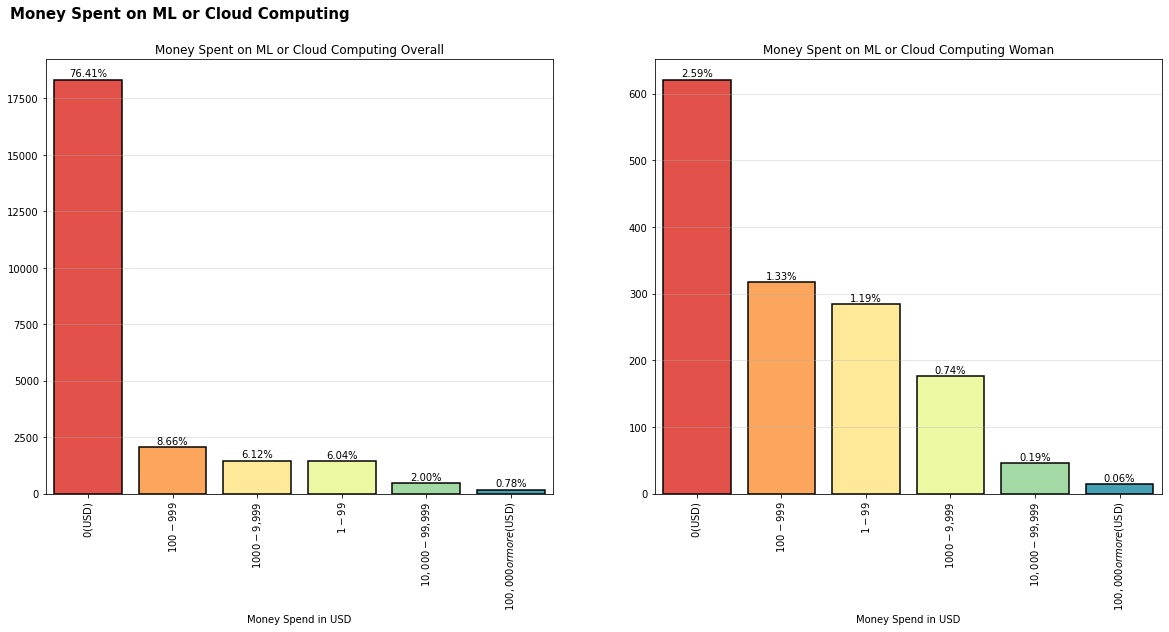

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
fig.text(0.1, 0.95, "Money Spent on ML or Cloud Computing", fontsize=15, fontweight='bold')  

sns.barplot(x=df_current['Q30'].value_counts(normalize=True).mul(100).index, y=df_current['Q30'].value_counts().values, palette='Spectral', edgecolor='black', linewidth=1.5, saturation = 1.5,ax=ax[0]); 
sns.barplot(x=woman_22['Q30'].value_counts(normalize=True).mul(100).index,
                y=woman_22['Q30'].value_counts().values, palette='Spectral', edgecolor='black', linewidth=1.5, saturation = 1.5, ax=ax[1]);  
    
for i, ax in enumerate(ax.flatten()):
    ax.grid(axis='y', linestyle='-', alpha=0.4) 
    ax.tick_params(axis='x', rotation=90)
    if i==0:t=shape; s = 'Overall'
    else:t=shape;s ='Woman'
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / t:.2f}%\n'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2,p.get_height()), ha='center', va='center')
        ax.set_xlabel('Money Spend in USD');ax.set_title("Money Spent on ML or Cloud Computing "+ s)
        

plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details of Money spend on ML or/and cloud computing for past 5 years</strong></p> 
 

   <li style="padding-left:1em">76.41% of survey takers have not spent any money to learn ML or on cloud computing services, may be almost all details are available free, only required is to have internet</li>
    <li style="padding-left:1em">Less than 1% have spent more than 100,000 USD for ML or/and or Cloud computing services.</li>

 

# <div class="section_title">Business Intelligence Tool</div>

In [56]:
bi_tool = pd.merge(df_comb(df_current,'Q36'),df_comb(woman_22,'Q36'),on='values')
bi_tool = bi_tool[bi_tool['values']!='None']
bi_tool['Overall - 2022']= bi_tool['percentage_x'].rank(ascending=False).astype(int)
bi_tool['Woman -2022']= bi_tool['percentage_y'].rank(ascending=False).astype(int)



bi_tool_lastyear = pd.merge(df_old['Q35'].value_counts().reset_index(),woman_21['Q35'].value_counts().reset_index(),on='index')
bi_tool_lastyear['2021 (%)']=(bi_tool_lastyear['Q35_x']/df_old.shape[0]).mul(100);bi_tool_lastyear['Woman 2021 (%)']=(bi_tool_lastyear['Q35_y']/woman_21.shape[0]).mul(100)
bi_tool_lastyear['Overall -2021']= bi_tool_lastyear['2021 (%)'].rank(ascending=False).astype(int)
bi_tool_lastyear['Woman - 2021']= bi_tool_lastyear['Woman 2021 (%)'].rank(ascending=False).astype(int)
bi_tool_lastyear.rename(columns={'index':'values'},inplace = True)

bi_tool_rank = pd.merge(bi_tool,bi_tool_lastyear, on ='values',how='outer')
bi_tool_rank = bi_tool_rank[['values','Overall - 2022','Overall -2021','Woman -2022','Woman - 2021']]
bi_tool_rank.fillna(0, inplace=True)
bi_tool_rank[['Overall - 2022','Overall -2021','Woman -2022','Woman - 2021']] = bi_tool_rank[['Overall - 2022','Overall -2021','Woman -2022','Woman - 2021']].astype(int)
bi_tool_rank.style.applymap(highlightcol,subset = pd.IndexSlice[:, ['Overall - 2022','Overall -2021','Woman -2022','Woman - 2021']])

,values,Overall - 2022,Overall -2021,Woman -2022,Woman - 2021
0,Tableau,1,2,1,1
1,Microsoft Power BI,2,1,2,2
2,Google Data Studio,3,3,3,3
3,Amazon QuickSight,4,7,8,8
4,Qlik Sense,5,0,6,0
5,Other,6,5,4,5
6,Microsoft Azure Synapse,7,11,10,10
7,Looker,8,13,5,14
8,Alteryx,9,8,8,10
9,SAP Analytics Cloud,10,10,7,8


# <div class="section_title">Favorite media sources that report on data science topics </div>

In [57]:
media = pd.merge(df_comb(df_current,'Q44'),df_comb(woman_22,'Q44'),on='values')
media['Rank - Overall']= media['percentage_x'].rank(ascending=False).astype(int)
media['Rank - Woman']= media['percentage_y'].rank(ascending=False).astype(int)

media = media[['values','Rank - Overall','Rank - Woman']]
media.style.applymap(highlightcol,subset = pd.IndexSlice[:, ['Rank - Overall','Rank - Woman']])

,values,Rank - Overall,Rank - Woman
0,"YouTube (Kaggle YouTube, Cloud AI Adventures, etc)",1,1
1,"Kaggle (notebooks, forums, etc)",2,2
2,"Blogs (Towards Data Science, Analytics Vidhya, etc)",3,3
3,"Course Forums (forums.fast.ai, Coursera forums, etc)",4,4
4,Twitter (data science influencers),5,7
5,"Journal Publications (peer-reviewed journals, conference proceedings, etc)",6,5
6,"Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",7,6
7,"Reddit (r/machinelearning, etc)",8,8
8,"Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)",9,9
9,"Slack Communities (ods.ai, kagglenoobs, etc)",10,10


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<strong>Analysis Details of Favorite Media for Data Science Topics</strong></p> 
 

<li style="padding-left:1em">YouTube (Kaggle YouTube, Cloud AI Adventures, etc), Kaggle (notebooks, forums, etc) and Blogs (Towards Data Science, Analytics Vidhya, etc) ranks from 1 ro 3.</li>
    <li style="padding-left:1em">Course Forums (forums.fast.ai, Coursera forums, etc), Twitter (data science influencers), Journal Publications (peer-reviewed journals, conference proceedings, etc) follows it from 4th to 6th.</li>
   

# Tableau Dashboard for Kaggle Survey 2022 

Link to Tableau Dashboard is [here](https://public.tableau.com/views/KaggleSurvey2022/KaggleSurvey2022?:language=en-US&:display_count=n&:origin=viz_share_link) 

In [58]:
%%HTML
<div class='tableauPlaceholder' id='viz1668936721715' style='position: relative'><noscript><a href='#'><img alt='KaggleSurvey2022 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ka&#47;KaggleSurvey2022&#47;KaggleSurvey2022&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='KaggleSurvey2022&#47;KaggleSurvey2022' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ka&#47;KaggleSurvey2022&#47;KaggleSurvey2022&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1668936721715');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1400px';vizElement.style.height='1927px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1400px';vizElement.style.height='1927px';} else { vizElement.style.width='100%';vizElement.style.height='3027px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>